In [1]:
import numpy as np
import sys
sys.path.insert(0, '../..') #This line adds '..' to the path so we can import the net_framework python file
from RNN_model_FORCE import *
import matplotlib.pyplot as plt
import networkx as nx
import scipy.signal as sp
import random
import pickle

Generating and Visualizing our Network

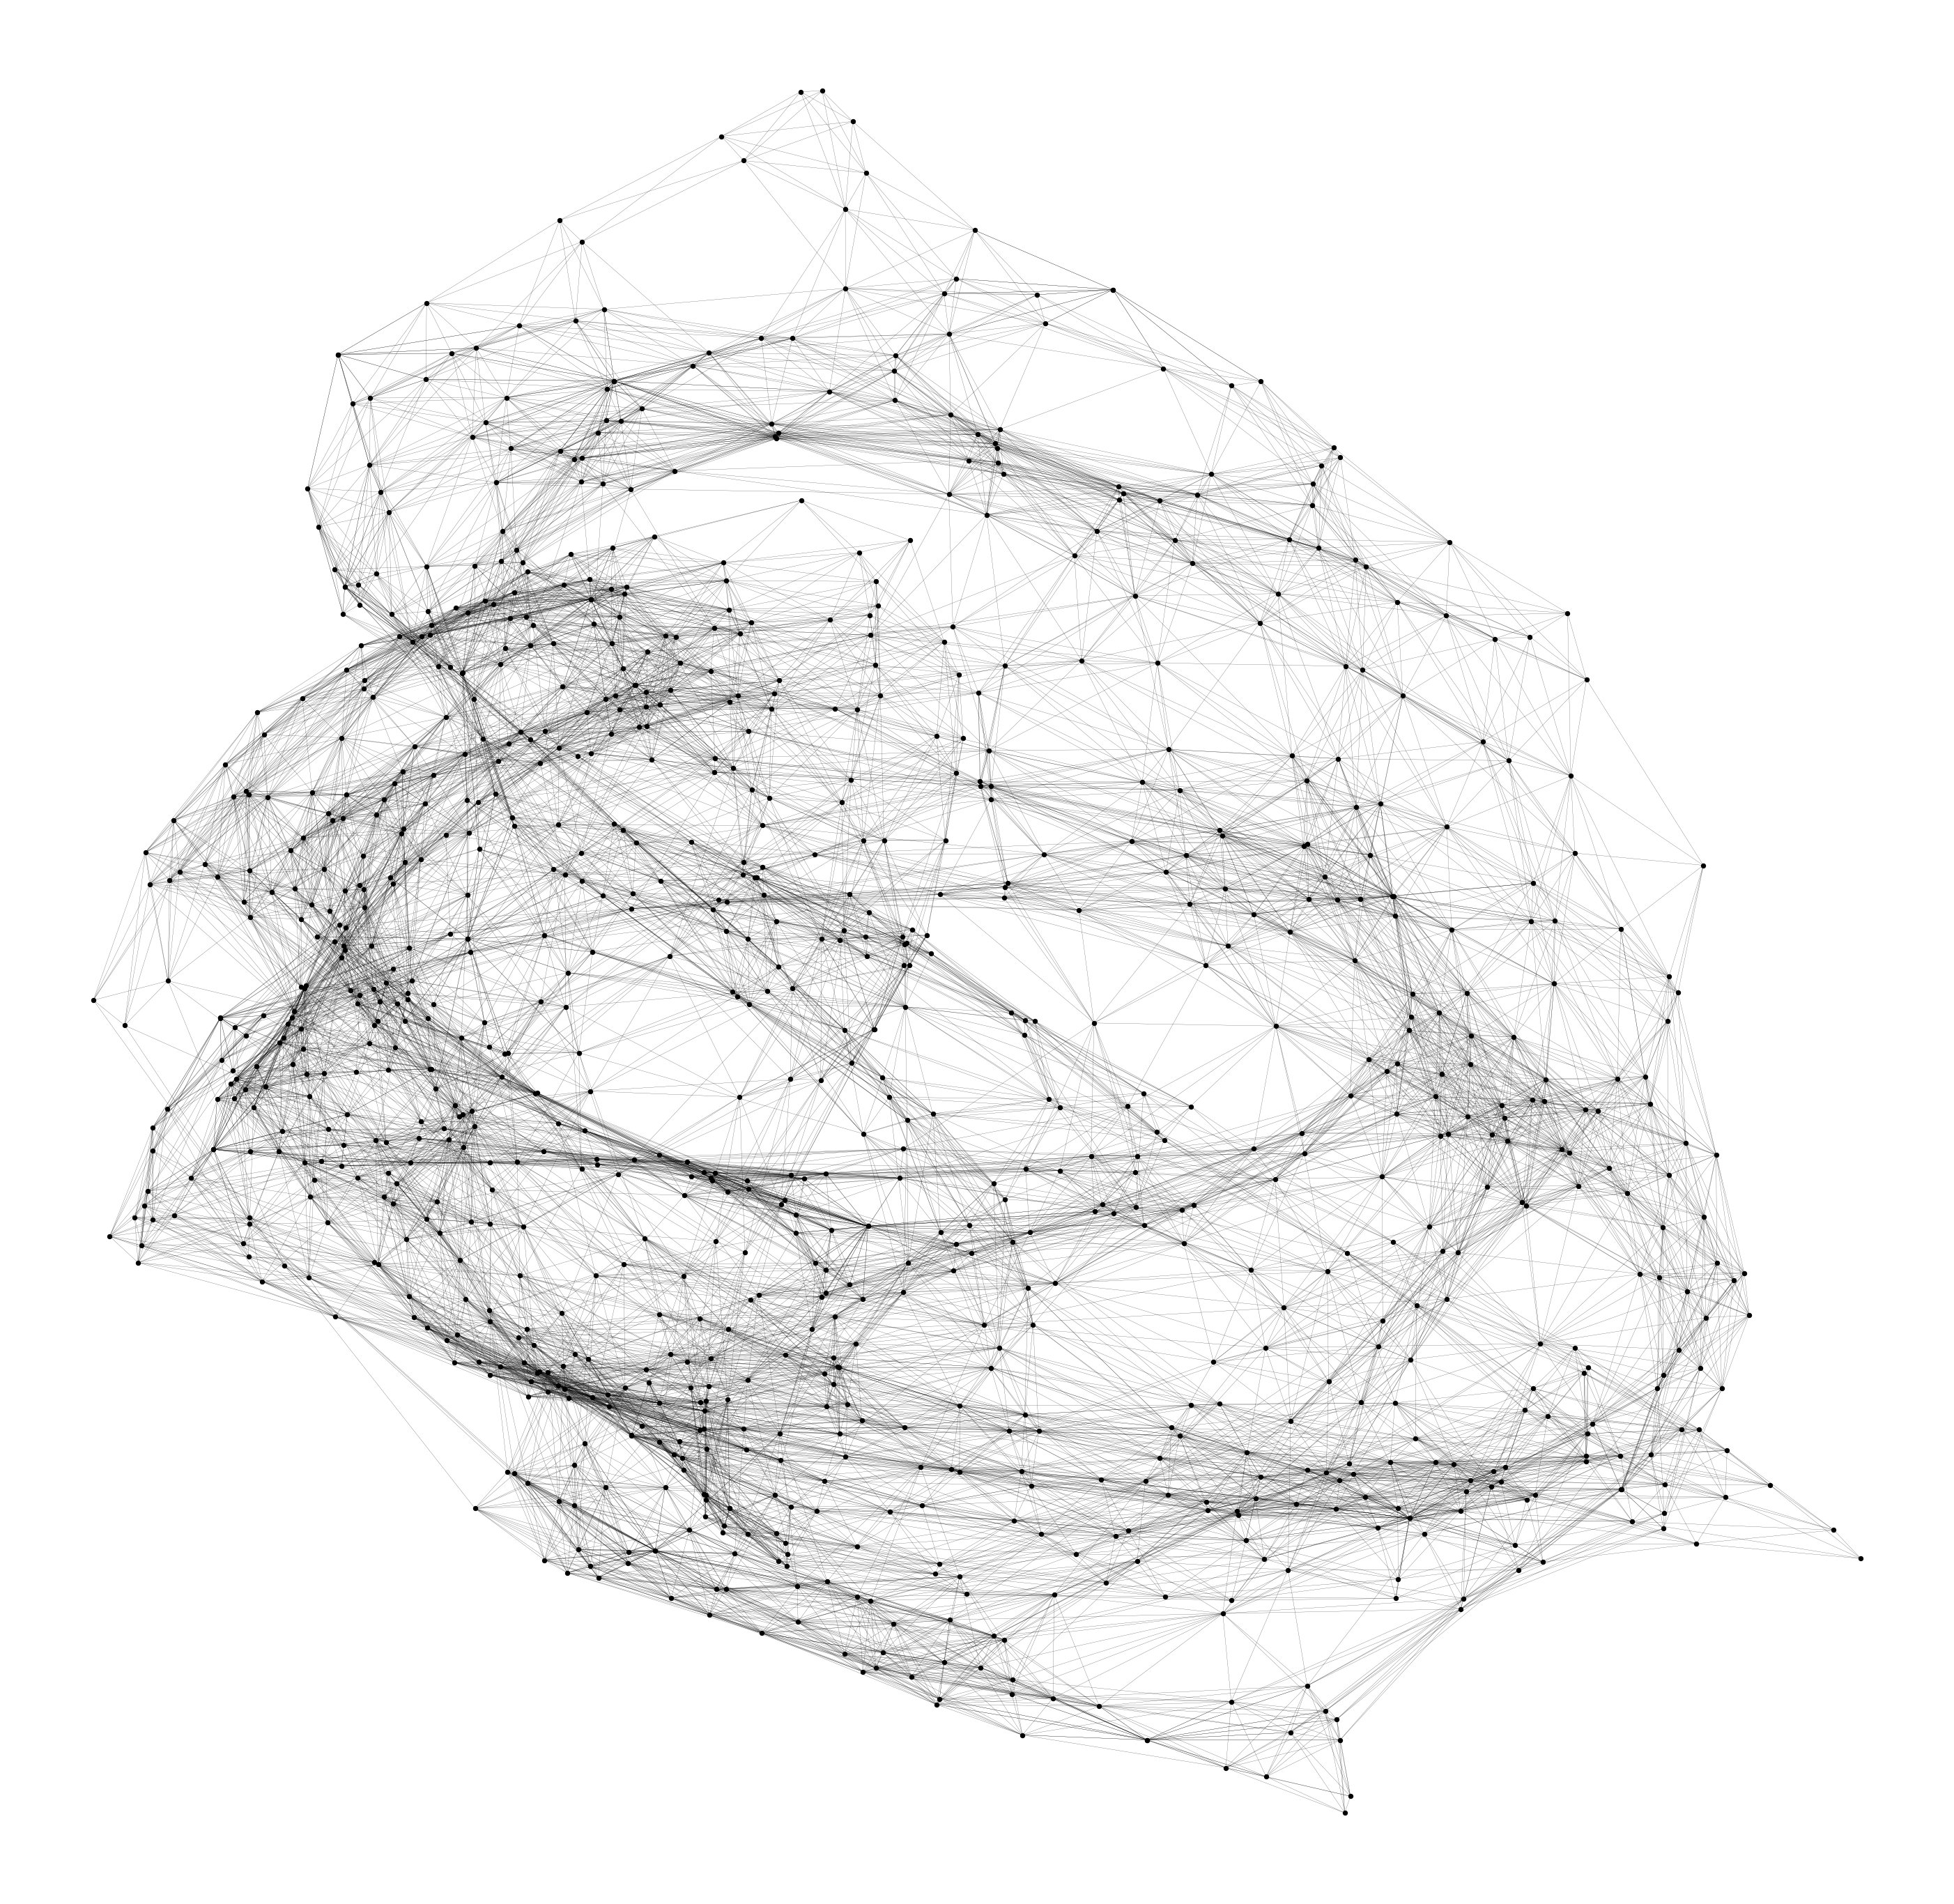

In [4]:
num_nodes = 1000
P_connection = 0.09
G = nx.random_geometric_graph(num_nodes, P_connection)
fig, ax = plt.subplots(figsize = [50,50])
options = {
    'node_color': 'black',
    'node_size': 40,
    'width': 0.2,
}

nx.draw(G, **options)
plt.show()

### Sin + Sawtooth

Setting edge weights and feedback for the recurrent network

In [ ]:
edges = np.asarray(G.edges())
edges = np.array(edges).astype('int32')
init_activations = np.random.uniform(-1, 1, num_nodes)
internal_weights = np.random.normal(0, 20/np.sqrt(num_nodes * P_connection), edges.shape[0])
output_weights = np.random.normal(0, 1/np.sqrt(num_nodes), (1, num_nodes))
def feedback(x):
    if x.timestep < 10:
        return 0
    else:
        output = x.output_node_list[0]
        activation = output.get_activation(x.timestep - 10)
        return 1.3 * np.tanh(np.sin(np.pi * activation))

feedback_weights = np.random.normal(0, 1/np.sqrt(num_nodes), (1, num_nodes))
sigmoid = lambda x : 1/(1 + np.exp(-x))

In [ ]:
a = RNN(num_nodes, init_activations, edges, internal_weights,
        1, output_weights, time_constant = 1.5, time_step = 0.2, feedback_funcs = [feedback],
        feedback_weights = feedback_weights)

Simulating Network Activity

In [ ]:
sim_time = 250
a.simulate(sim_time)
print(a.internal_weights.shape)

Visualizing Network Output

In [ ]:
outputs = a.get_output_activations()[0]
fig, ax = plt.subplots()
plt.plot(range(a.timestep + 1), outputs)
plt.show()

Visualizing actiivty of first 10 nodes

In [ ]:
node_activations = a.get_internal_node_activations()
for i in range(10):
    fig, ax = plt.subplots()
    plt.plot(range(a.timestep + 1), node_activations[i])
    plt.show()

Training Network to match Sin+Sawtooth function gien by f

In [ ]:
train_time = 500
f = lambda t : .5 * sp.sawtooth(2 * np.pi * 1/100 * t, width = 0.5) + .5 * np.sin(2 * np.pi * 1/50 * t + np.pi/4)
a.FORCE_train(train_time, f, alpha = 10, timesteps_per_update = 1,
             train_weights = {'internal' : False, 'input' : False, 
                              'output' : True, 'feedback' : False})
print(a.internal_weights.shape)

Visualizing output before and during training

In [ ]:
outputs = a.get_output_activations()
fig, ax = plt.subplots()
time = np.array(range(a.timestep + 1))
plt.plot(time, outputs[0])
plt.plot(time, f(time))
plt.xlabel("time")
plt.ylim(-1.2, 1.2)
plt.ylabel("Output Before and During Training")
plt.show()


Visualizing node activity before and during training

In [ ]:
node_activations = a.get_internal_node_activations()
for i in range(10):
    fig, ax = plt.subplots()
    plt.plot(range(sim_time + train_time + 1), node_activations[i])
    plt.show()

Visualizing amount of weight update

In [ ]:
weight_updates = [np.mean(np.absolute(np.array(a.weight_history[i + 1]) - np.array(a.weight_history[i]))) for i in range(len(a.weight_history) - 1)]
plt.plot(range(len(a.weight_history) - 1), weight_updates)
plt.xlabel("Weight Update Number")
plt.ylabel("Amout weight was changed")

Simulating network without training to check for convergence

In [ ]:
new_sim_time = 250
a.simulate(new_sim_time)

Visualizing output, verifying convergence

In [ ]:

outputs = a.get_output_activations()[0]
fig, ax = plt.subplots()
t = np.arange(a.timestep + 1)
plt.plot(t, outputs)
plt.plot(t, f(t))
plt.xlim(sim_time + train_time, a.timestep + 1)
plt.ylim(-1.2, 1.2)
plt.show()

Saving network

In [ ]:
with open('saved_nets/sin_and_sawtooth.RNN', 'wb') as RNN_file:
    pickle.dump(a, RNN_file)

Code example for loaing the network (required if loading on a new notebook)

In [ ]:
def feedback(x):
    if x.timestep < 10:
        return 0
    else:
        output = x.output_node_list[0]
        activation = output.get_activation(x.timestep - 10)
        return 1.3 * np.tanh(np.sin(np.pi * activation))
    
f = lambda t : .5 * sp.sawtooth(2 * np.pi * 1/100 * t, width = 0.5) + .5 * np.sin(2 * np.pi * 1/50 * t + np.pi/4)

with open('saved_nets/sin_and_sawtooth.RNN', 'rb') as RNN_file:
    loaded_RNN = pickle.load(RNN_file)

### Sawtooth

Defining RNN, code is same as previous example

In [ ]:
edges = np.asarray(G.edges())
edges = np.array(edges).astype('int32')
init_activations = np.random.uniform(-1, 1, num_nodes)
internal_weights = np.random.normal(0, 20/np.sqrt(num_nodes * P_connection), edges.shape[0])
output_weights = np.random.normal(0, 1/np.sqrt(num_nodes), (1, num_nodes))
def feedback(x):
    if x.timestep < 10:
        return 0
    else:
        output = x.output_node_list[0]
        activation = output.get_activation(x.timestep - 10)
        return 1.3 * np.tanh(np.sin(np.pi * activation))

feedback_weights = np.random.normal(0, 1/np.sqrt(num_nodes), (1, num_nodes))
sigmoid = lambda x : 1/(1 + np.exp(-x))

In [ ]:
a = RNN(num_nodes, init_activations, edges, internal_weights,
        1, output_weights, time_constant = 1.5, time_step = 0.2, feedback_funcs = [feedback],
        feedback_weights = feedback_weights)

In [ ]:
sim_time = 250
a.simulate(sim_time)
print(a.internal_weights.shape)

In [ ]:
outputs = a.get_output_activations()[0]
fig, ax = plt.subplots()
plt.plot(range(a.timestep + 1), outputs)
plt.show()

In [ ]:
node_activations = a.get_internal_node_activations()
for i in range(10):
    fig, ax = plt.subplots()
    plt.plot(range(a.timestep + 1), node_activations[i])
    plt.show()

In [ ]:
train_time = 500
f = lambda t : sp.sawtooth(2 * np.pi * 1/100 * t, width = 0.5)
a.FORCE_train(train_time, f, alpha = 10, timesteps_per_update = 1,
             train_weights = {'internal' : False, 'input' : False, 
                              'output' : True, 'feedback' : False})
print(a.internal_weights.shape)

In [ ]:
outputs = a.get_output_activations()
fig, ax = plt.subplots()
time = np.array(range(a.timestep + 1))
plt.plot(time, outputs[0])
plt.plot(time, f(time))
plt.xlabel("time")
plt.ylim(-1.2, 1.2)
plt.ylabel("Output Before and During Training")
plt.show()


In [ ]:
new_sim_time = 250
a.simulate(new_sim_time)

In [ ]:

outputs = a.get_output_activations()[0]
fig, ax = plt.subplots()
t = np.arange(a.timestep + 1)
plt.plot(t, outputs)
plt.plot(t, f(t))
plt.xlim(sim_time + train_time, a.timestep + 1)
plt.ylim(-1.2, 1.2)
plt.show()

In [ ]:
with open('saved_nets/sawtooth.RNN', 'wb') as RNN_file:
    pickle.dump(a, RNN_file)

Code example for loaing the network (required if loading on a new notebook)

In [ ]:
def feedback(x):
    if x.timestep < 10:
        return 0
    else:
        output = x.output_node_list[0]
        activation = output.get_activation(x.timestep - 10)
        return 1.3 * np.tanh(np.sin(np.pi * activation))
    
f = lambda t : sp.sawtooth(2 * np.pi * 1/100 * t, width = 0.5)

with open('saved_nets/sawtooth.RNN', 'rb') as RNN_file:
    loaded_RNN = pickle.load(RNN_file)